# Navigating Turbulent Odor Plumes Using Reinforcement Learning

<figure>
    <img src = "data/plume_fig2.png" width="300" align="left">
</figure>
This notebook uses the Q-learning algorithm of Reinforcement Learning (RL) to train virtual agents to navigate a 2D turbulent odor plume. Turbulent odor plumes are spatiotemporally complex: odor signals arrive in random, unpredictable bursts, and odor concentration does follow continuous gradients, making plume navigation a difficult task. Suprisingly, there has been no published work on applying RL algorithms to turbulent odor plume navigation. 
<br>
<br>
<br>




## Q-learning algorithm
Q-learning updates a state-action value function, $Q(a, s)$, which quantifies the value of taking action $a$ when in state $s$. This function is updated in time using the Q-learning algorithm. At each timestep, the navigator takes an action $A$ to go from state $S$ to state $S'$, using whatever policy (greedy, $\epsilon$-greedy, etc.), where it receives a reward $R$. Then $Q(A, S)$ is updated using a *greedy* update rule (hence *off-policy*):

$\begin{align}
 Q(A, S) \leftarrow Q(A, S) + \alpha[R + \gamma \max_a Q(a, S')  - Q(A, S)]
\end{align}$

Here, $\alpha < 1$ and $\gamma < 1$ are update step-size and learning rate -- both hyperparameters in the simulation.

### State space: $\{s\}$

Following results found recently for navigation of odor plumes by fruit flies, we assume that navigators rely on the frequency of odor hits. An odor hit is the time at which the signal surpassses a given threshold. Running average of hit frequency, $W_{freq}$, is found by convolving the binary time series of odor hit times $w(t)$ with an exponential kernel ($\tau = 2$ seconds):

$W_{freq} = \int^t_{-\infty} e^{-(t-t')/\tau} w(t')dt'$

We discretize the state space into low and high frequency,

$S_1$: $W_{freq} < \text{thresh}$

$S_2$: $W_{freq} >= \text{thresh}$

where $thresh$ is to be chosen

### Action space: $\{a\}$
The navigators move on a grid, and we assume that there are 4 actions:

$A_1$: turn upwind (i.e. left)
$A_2$: walk straight
$A_3$: turn toward the plume centerline
$A_4$: turn downwind (i.e. right)

The action $A_e$ means that, in the plume cone, flies in the top half will turn downward, and flies in the bottom half will turn upward. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import sys
sys.path.append('src')
from utils import gen_plot
from models import *

### centerline_upwind_downwind

In [3]:
a = centerline_upwind_downwind()
a.num_walkers = 500
a.def_actions()
a.num_steps = 2000
a.def_states(freq_bins=[-1, 0.5, 3, 5, 7, 100])
xs, ys, Q, Q_terminal, path_lengths = a.run()

99.9%

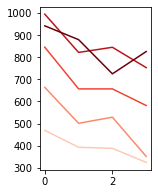

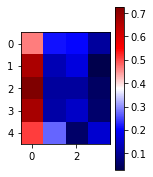

In [4]:
fig = plt.figure(figsize=(2, 3))
colors = plt.cm.Reds(np.linspace(0.2, 1.0, a._num_states))
for i in range(a._num_states):
    plt.plot(Q_terminal[i], color=colors[i])
plt.show()
temp = 100
fig = plt.figure(figsize=(2, 3))
Q_norm = (np.exp(Q_terminal.T/temp)/np.sum(np.exp(Q_terminal/temp), axis=-1)).T
plt.imshow(Q_norm, cmap=plt.cm.seismic)
plt.colorbar()
plt.show()

In [ ]:
xs, ys, path_lengths = a.run_optimal_action(Q_terminal, temp=100)

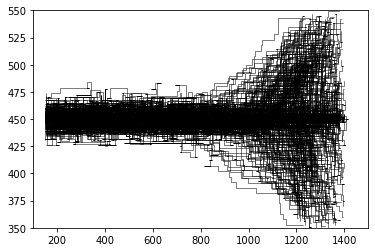

In [6]:
#colors = np.vstack((np.zeros(a.num_walkers), np.diff(xs, axis=0) < 0))
#plt.scatter(xs, ys, c = colors, s = 5, cmap=plt.cm.seismic)
for iW in range(a.num_walkers):
    plt.plot(xs[:path_lengths[iW], iW], ys[:path_lengths[iW], iW], color='k', lw=0.5)
plt.xlim(100, 1500)
plt.ylim(450 - 100, 450 + 100)
plt.show()

### centerline_upwind_downwind_turns

In [9]:
a = centerline_upwind_downwind_turns()
a.num_walkers = 100
a.def_actions()
a.num_steps = 2000
a.def_states(freq_bins=[-1, 0.5, 3, 5, 7, 100])
xs, ys, Q, Q_terminal, path_lengths = a.run()

99.9%

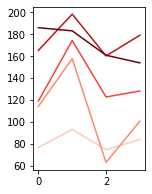

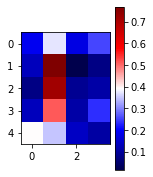

In [12]:
fig = plt.figure(figsize=(2, 3))
colors = plt.cm.Reds(np.linspace(0.2, 1.0, a._num_states))
for i in range(a._num_states):
    plt.plot(Q_terminal[i], color=colors[i])
plt.show()
temp = 25
fig = plt.figure(figsize=(2, 3))
Q_norm = (np.exp(Q_terminal.T/temp)/np.sum(np.exp(Q_terminal/temp), axis=-1)).T
plt.imshow(Q_norm, cmap=plt.cm.seismic)
plt.colorbar()
plt.show()

In [ ]:
xs, ys, path_lengths = a.run_optimal_action(Q_terminal, temp=25)

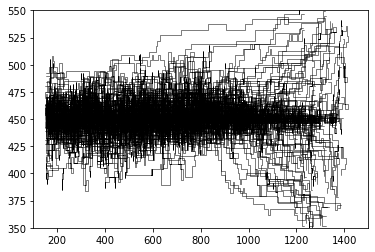

In [14]:
for iW in range(a.num_walkers):
    plt.plot(xs[:path_lengths[iW], iW], ys[:path_lengths[iW], iW], color='k', lw=0.5)
plt.xlim(100, 1500)
plt.ylim(450 - 100, 450 + 100)
plt.show()

### Finer motor control on turning

In [7]:
a = upwind_downwind_turns()
a.x0_min = 1000
a.num_walkers = 1000
a.def_actions()
a.num_steps = 5000
a.def_states(freq_bins=[-1, 0.01, 1, 2, 100])
xs, ys, Q, Q_terminal, path_lengths = a.run()

100.0%

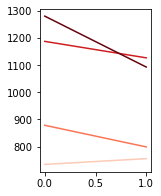

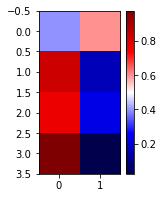

In [8]:
fig = plt.figure(figsize=(2, 3))
colors = plt.cm.Reds(np.linspace(0.2, 1.0, a._num_states))
for i in range(a._num_states):
    plt.plot(Q_terminal[i], color=colors[i])
plt.show()
temp = 50
fig = plt.figure(figsize=(2, 3))
Q_norm = (np.exp(Q_terminal.T/temp)/np.sum(np.exp(Q_terminal/temp), axis=-1)).T
plt.imshow(Q_norm, cmap=plt.cm.seismic)
plt.colorbar()
plt.show()

In [34]:
a.epsilon=0
a.num_walkers = 200
a.num_steps = 1000
xs, ys, path_lengths = a.run_optimal_action(Q_terminal, temp=50)

99.9%

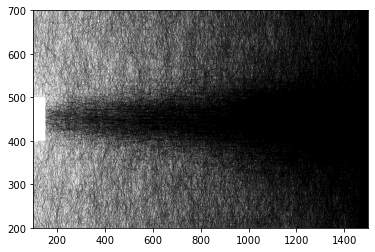

In [10]:
for iW in range(a.num_walkers):
    plt.plot(xs[:path_lengths[iW], iW], ys[:path_lengths[iW], iW], color='k', lw=0.05)
plt.xlim(100, 1500)
plt.ylim(450 - 250, 450 + 250)
plt.show()